<a href="https://colab.research.google.com/github/sathasivamn/LGBM-XGBM/blob/main/Assignment_15_LGBM_%26_XGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LGBM & XGBM
### 1: Import Libraries
### 2. Load the dataset
### 3. Exploratory Data Analysis
### 4. Data Preprocessing
### 5. Train-Test Split
### 6. LightGBM Model
### 7. XGBoost Model
### 8. Cross-Validation Scores
### 9. Feature Importance Visualization
### 10. Comparative Analysis

1: Import Libraries

In [17]:
# 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# 2: Loading Dataset

In [18]:
# 2: Load Data
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)

train.head()

Training Data Shape: (891, 12)
Testing Data Shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3: Exploratory Data Analysis
### a. Check for missing values
### b. Histograms
### c. Boxplots

In [19]:
# 3: Exploratory Data Analysis

# Check for missing values
print("Missing values in training data:\n", train.isnull().sum())

Missing values in training data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


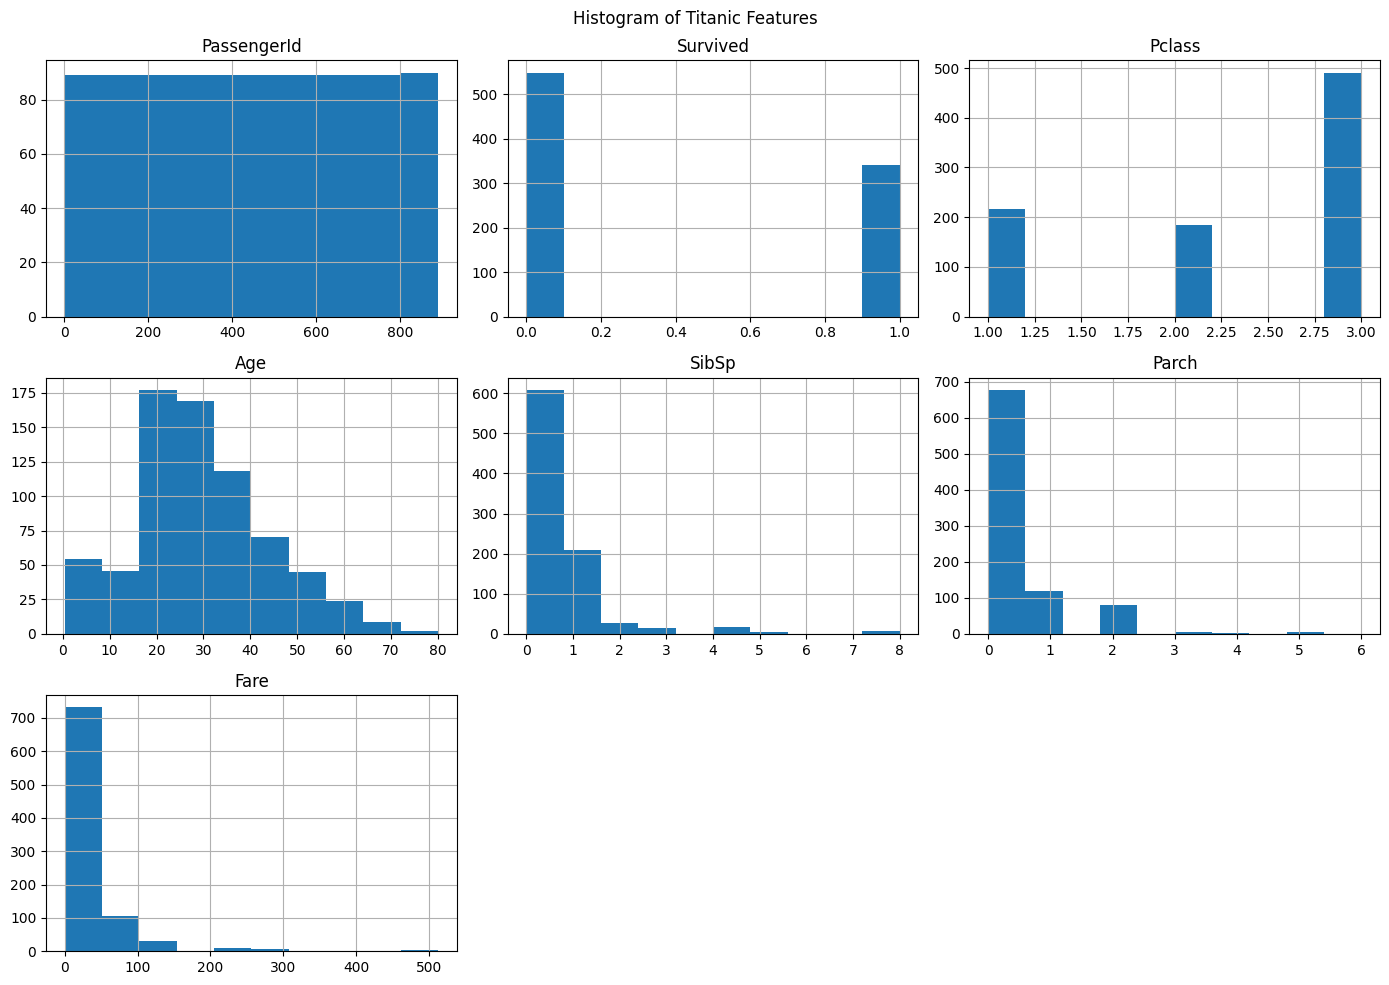

In [20]:
# Histograms
train.hist(figsize=(14, 10))
plt.suptitle("Histogram of Titanic Features")
plt.tight_layout()
plt.show()

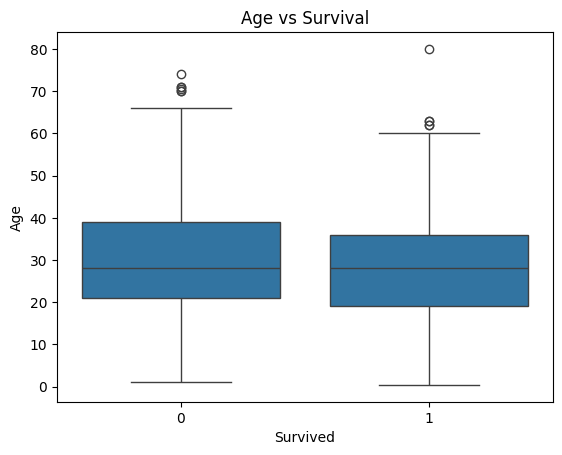

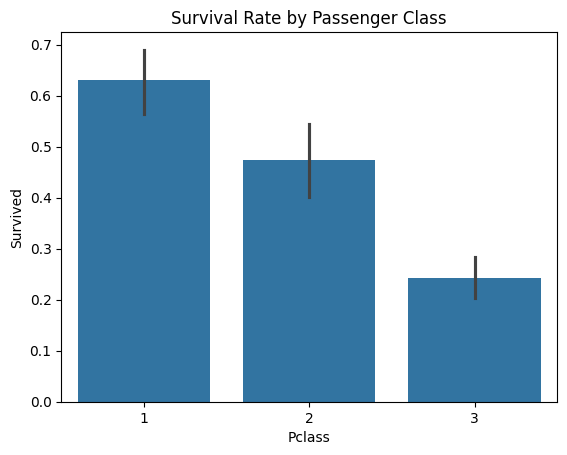

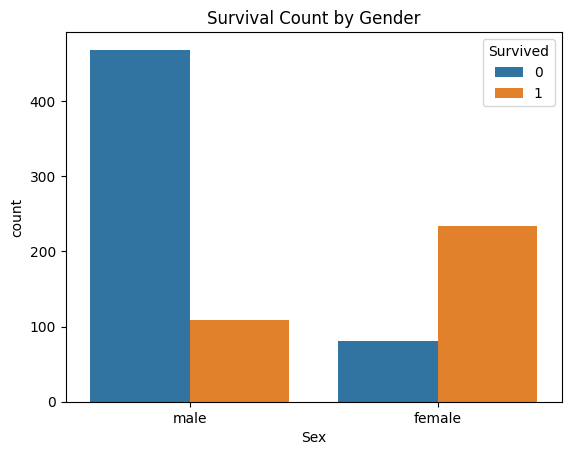

In [21]:
# Boxplots
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Age vs Survival")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival Count by Gender")
plt.show()

# 4: Data Preprocessing
### a. Combine train & test for uniform preprocessing
### b. Impute Age and Fare with median
### c. Fill Embarked with most common value
### d. Drop Cabin due to too many missing values
### e. Encode Sex and Embarked
### f. Split back to train and test


In [22]:
# 4: Data Preprocessing

# Combine train & test for uniform preprocessing
full = pd.concat([train, test], sort=False).reset_index(drop=True)

In [23]:
# Impute Age and Fare with median
full['Age'].fillna(full['Age'].median(), inplace=True)
full['Fare'].fillna(full['Fare'].median(), inplace=True)

In [24]:
# Fill Embarked with most common value
full['Embarked'].fillna(full['Embarked'].mode()[0], inplace=True)

In [25]:
# Drop Cabin due to too many missing values
full.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [26]:
# Encode Sex and Embarked
le = LabelEncoder()
full['Sex'] = le.fit_transform(full['Sex'])
full['Embarked'] = le.fit_transform(full['Embarked'])

In [27]:
# Split back to train and test
train_cleaned = full[~full['Survived'].isna()]
test_cleaned = full[full['Survived'].isna()].drop('Survived', axis=1)

X = train_cleaned.drop(['Survived', 'PassengerId'], axis=1)
y = train_cleaned['Survived'].astype(int)
X_test_final = test_cleaned.drop('PassengerId', axis=1)

# 5: Train-Test Split

In [28]:
# 5: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6: LightGBM Model

In [29]:
# 6: LightGBM Model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_val)

print("LightGBM Classification Report:")
print(classification_report(y_val, lgbm_preds))
print("LightGBM Accuracy:", accuracy_score(y_val, lgbm_preds))

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# 7: XGBoost Model

In [30]:
# 7: XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)

print("XGBoost Classification Report:")
print(classification_report(y_val, xgb_preds))
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_preds))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

XGBoost Accuracy: 0.8156424581005587


# 8: Cross-Validation Scores

In [31]:
# 8: Cross-Validation Scores
print("LGBM Cross-Validation Accuracy:", cross_val_score(lgbm, X, y, cv=5).mean())
print("XGB Cross-Validation Accuracy:", cross_val_score(xgb, X, y, cv=5).mean())

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# 9: Feature Importance Visualization

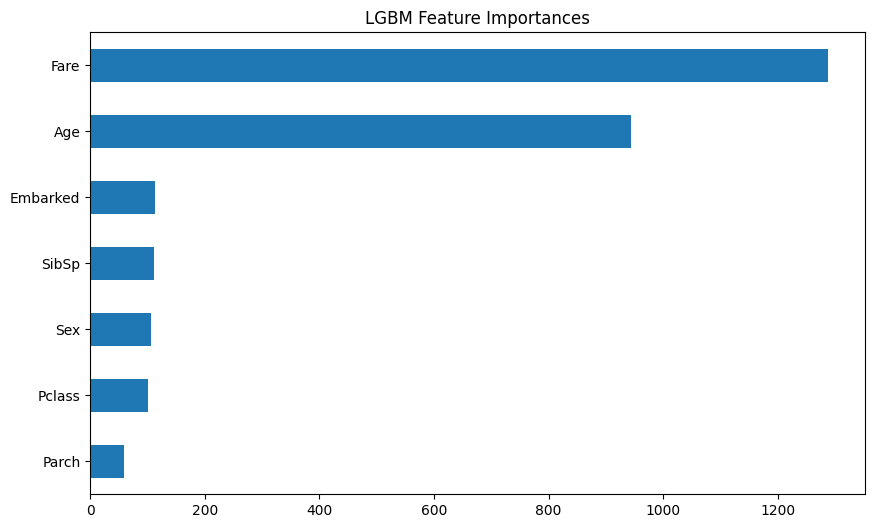

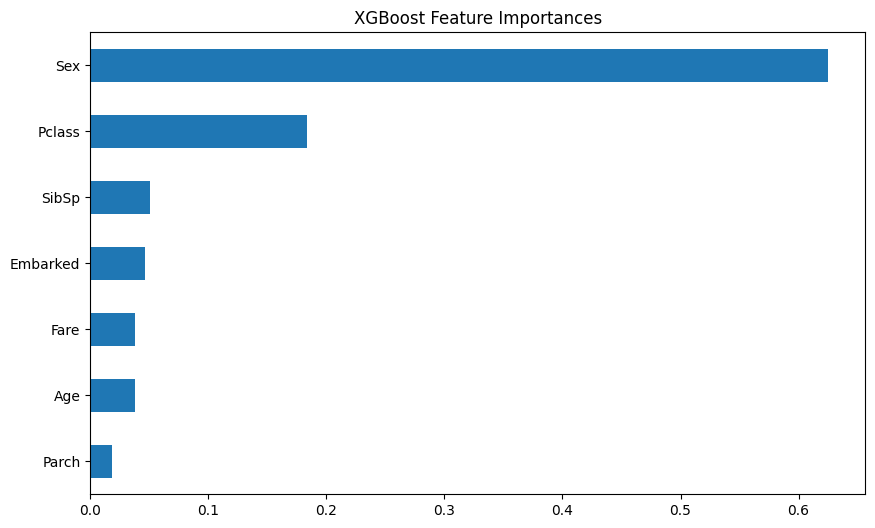

In [32]:
# 9: Feature Importance Visualization
lgbm_feat = pd.Series(lgbm.feature_importances_, index=X.columns).sort_values(ascending=True)
xgb_feat = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
lgbm_feat.plot(kind='barh', title="LGBM Feature Importances")
plt.show()

plt.figure(figsize=(10, 6))
xgb_feat.plot(kind='barh', title="XGBoost Feature Importances")
plt.show()

# 10. Comparative Analysis: LightGBM vs XGBoost


### Metric	        -  LightGBM	                     - XGBoost
### Accuracy	    - (printed result)	               - (printed result)
### Precision	    - via classification_report()	     - via classification_report()
### Recall	      - same	                           - same
### F1-Score	    - same	                           - same
### CV Accuracy	  - average from 5-fold CV           - average from 5-fold CV



## Insights:
#### LightGBM is typically faster, especially on large datasets.
#### XGBoost tends to perform slightly better on tabular data with fine-tuned parameters.
#### Feature importances can guide which features to retain for future model improvements.